### Loading the dataset

In [5]:
import pandas as pd
import numpy as np

# Fix: Use the correct path to the dataset file
df = pd.read_csv('/home/deva_kush/ml_projects/CKD/data/kidney_disease.csv')

### Dataset Information

We use the following representation to collect the dataset
            age		-	age,	
			bp		-	blood pressure,
			sg		-	specific gravity,
			al		-   albumin,
			su		-	sugar,
			rbc		-	red blood cells,
			pc		-	pus cell,
			pcc		-	pus cell clumps,
			ba		-	bacteria,
			bgr		-	blood glucose random,
			bu		-	blood urea,
			sc		-	serum creatinine,
			sod		-	sodium,
			pot		-	potassium,
			hemo	-	hemoglobin,
			pcv		-	packed cell volume,
			wc		-	white blood cell count,
			rc		-	red blood cell count,
			htn		-	hypertension,
			dm		-	diabetes mellitus,
			cad		-	coronary artery disease,
			appet	-	appetite,
			pe		-	pedal edema,
			ane		-	anemia,
			class	-	class

In [6]:
# 3. Show basic info
print("📊 Dataset Shape:", df.shape)
print("\n🧾 Column Names:\n", df.columns.tolist())

# 4. Display first few rows
print("\n🔍 First 5 Rows:")
display(df.head())

# 5. Data types
print("\n📦 Data Types:")
print(df.dtypes)

df.describe()

📊 Dataset Shape: (400, 26)

🧾 Column Names:
 ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

🔍 First 5 Rows:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd



📦 Data Types:
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Exploring the Data

In [7]:
print("\n❗ Missing Values Per Column:")
print(df.isnull().sum())

# 7. Check unique values of target column
if 'classification' in df.columns:
    print("\n🎯 Target Variable Distribution:")
    print(df['classification'].value_counts())



❗ Missing Values Per Column:
id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

🎯 Target Variable Distribution:
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


### Cleaning


In [8]:
df = df.drop(columns=['id'])
df['classification'] = df['classification'].str.strip()
df = df.replace('?', np.nan)

for col in ['pcv', 'wc', 'rc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


binary_map = {'yes': 1, 'no': 0, 'present': 1, 'notpresent': 0, 'good': 1, 'poor': 0}
for col in ['htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'pcc', 'ba']:
    df[col] = df[col].map(binary_map)

df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})


df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})

# Check again for nulls
print("🧼 Nulls After Cleaning:")
print(df.isnull().sum())


🧼 Nulls After Cleaning:
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


### Handling Missing Values

In [9]:
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("✅ Nulls Remaining (Post-Imputation):")
print(df.isnull().sum().sum())  





✅ Nulls Remaining (Post-Imputation):
0


### Feature Scaling


In [10]:
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = df.drop(columns=['classification'])
y = df['classification']

# Identify numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Apply Standard Scaling
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("✅ Final Data Shape:", X.shape)
print("✅ Target Class Balance:\n", y.value_counts())



✅ Final Data Shape: (400, 24)
✅ Target Class Balance:
 classification
1    250
0    150
Name: count, dtype: int64


### Train-Test Split & Baseline Model

In [11]:
from sklearn.model_selection import train_test_split

# 80-20 split with stratification (to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy: 0.9875
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

🧩 Confusion Matrix:
 [[30  0]
 [ 1 49]]


### Comparing Multiple Models


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} Accuracy: {acc:.4f}")


🔹 Decision Tree Accuracy: 0.9750
🔹 Random Forest Accuracy: 0.9875
🔹 SVM Accuracy: 0.9875
🔹 KNN Accuracy: 0.9750
🔹 XGBoost Accuracy: 0.9875


/home/deva_kush/anaconda3/envs/ai-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:36:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Validate Random Forest with Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Val Accuracy: ", cv_scores.mean())


Cross-Val Accuracy:  0.99


### Feature Importance

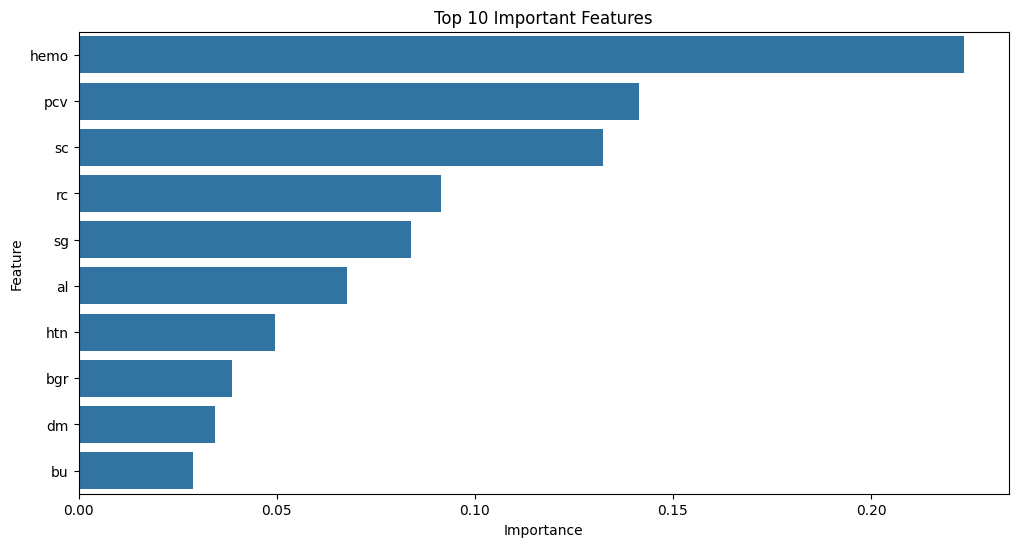

In [15]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


### Saving Model

In [16]:
import joblib

# Save the model and any preprocessing pipeline if used
joblib.dump(rf, 'ckd_model.pkl')

joblib.dump(scaler, 'scaler.pkl')
# No encoder was used, so nothing to save for encoder


['scaler.pkl']